In [ ]:
from os import killpg
from numpy.core import numeric
import numpy as np
import random
import math
import statistics
import networkx as nx
import matplotlib.pyplot as plt


class Node:
    def __init__(self, node_id, transmit_prob):
        self.node_id = node_id
        self.neighbors = []
        self.transmit_prob = transmit_prob
        self.is_transmitting = 0
        self.state= False
        self.prev_state = 0
        self.active_time=0

    def add_neighbor(self, neighbor):
        self.neighbors.append(neighbor)

    def update_state(self,num_channel):
        channels=[0]*(num_channel)
        free=[]
        for x in self.neighbors:
          channels[x.is_transmitting]+=1
        for i in range(1,num_channel):
          if channels[i]==0 and i!=0:
            free.append(i)
        k=len(free)
        if random.uniform(0,1)>(1/(1+(k*self.transmit_prob))) and k!=0:
            self.is_transmitting=np.random.choice(free)
        else:
            self.is_transmitting=0


    def get_state(self):
        return int(self.is_transmitting)


def make(nodes):
    graph_map=[]
    for node in nodes:
      graph_map.append(node.is_transmitting)

    return graph_map

def nrml(map,transmit_prob,num_nodes):
  sum=0
  for x in map:
    sum+=map[x]

  return sum


def find(timed,graph,n):
  time=[x/n for x in timed]

  k=len(graph)
  adj=[[0 for i in range(k)] for j in range(k)]
  d=[0]*k
  for i in range(k):
    for j in range(k):
      if graph[i][j]==1:
        d[i]+=1
        adj[i][j]=(time[i]+time[j]-1+math.sqrt((4*(n-1)*time[i]*time[j])+(time[i]+time[j]-1)**2))/(2*(n-1))

  prob=[]
  for i in range(k):
    const=((1-n*time[i])/time[i])**(d[i]-1)
    m=1
    for j in range(k):
      if graph[i][j]==1:
        m*=(time[i]-((n-1)*adj[i][j]))/(1-(n*time[i])-(n*time[j])+(n*(n-1)*adj[i][j]))
    const*=m
    prob.append(const)

  return prob

def generate_states(num_nodes, num_states,graph):
    states = []
    for i in range(num_states ** num_nodes):
        state = []
        check=1
        for j in range(num_nodes):
          state.append((i // (num_states ** j)) % num_states)
        states.append(state)
    return states

def req(initial,num_nodes,graph):
  required=[]
  for i in initial:
    check=1
    for x in range(num_nodes):
        for y in range(num_nodes):
          if graph[x][y]==1 and i[x]!=0 and i[y]!=0 and i[x]==i[y]:
              check=0
              break
        if check==0:
         break
    if check==1:
      required.append(i)

  return required

def nrml(required,transmit_prob,num_nodes):
  sum=0
  for x in required:
    prod=1
    for i in range(num_nodes):
      statee=0
      if x[i]>0:
         statee=1
      prod=prod*pow(transmit_prob[i],statee)
    sum+=prod

  return sum

def prob(curr,num_nodes,transmit_prob):
  prod=1
  for i in range(num_nodes):
    statee2=0
    if curr[i]>0:
         statee2=1
    prod=prod*pow(transmit_prob[i],statee2)

  return prod

def simulate_csma(graph, transmit_prob, num_iterations,num_channel):
    num_nodes = len(graph)
    nodes = []
    for i in range(num_nodes):
        nodes.append(Node(i, transmit_prob[i]))

    # Build connections between nodes
    for i in range(num_nodes):
        node = nodes[i]
        for j in range(num_nodes):
            if graph[i][j] == 1:
                node.add_neighbor(nodes[j])

    map={}

    # Run the CSMA algorithm for the specified number of iterations
    for _ in range(num_iterations):
        node_index=np.random.randint(0,num_nodes)
        node=nodes[node_index]
        node.update_state(num_channel)
        for node in nodes:
         if (node.is_transmitting)>0:
           node.active_time+=1
        #for node in nodes:
         # print(node.is_transmitting)
        map2=make(nodes)
        map3=tuple(map2)
        map[map3]=map.get(map3,0)+1;

    active=[]
    for node in nodes:
          active.append(node.active_time/num_iterations)




    # Calculate the fraction of time each node is active
    #fraction_active_time = []
    #for node in nodes:
     #   fraction_active_time.append(node.active_time)

    return map, active

def generate_random_graph(n):
    # Generate n random points between (0,0) and (3,3)
    points = [(random.uniform(0, 5), random.uniform(0, 5)) for _ in range(n)]

    # Initialize adjacency matrix with zeros
    adjacency_matrix = np.zeros((n, n), dtype=int)

    # Populate the adjacency matrix based on distance
    for i in range(n):
        for j in range(i+1, n):
            # Calculate distance between points i and j
            distance = np.sqrt((points[i][0] - points[j][0])**2 + (points[i][1] - points[j][1])**2)

            # If distance is less than 1, add an edge
            if distance < 1:
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1

    return adjacency_matrix

def generate_random_graph2(n):
    # Generate n random points between (0,0) and (3,3)
    points = [(random.uniform(0, math.sqrt(n/1.6)), random.uniform(0,math.sqrt(n/1.6))) for _ in range(n)]

    # Initialize adjacency matrix with zeros
    adjacency_matrix = np.zeros((n, n), dtype=int)

    # Populate the adjacency matrix based on distance
    for i in range(n):
        for j in range(i+1, n):
            # Calculate distance between points i and j
            distance = np.sqrt((points[i][0] - points[j][0])**2 + (points[i][1] - points[j][1])**2)

            # If distance is less than 1, add an edge
            if distance < 1:
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1

    return adjacency_matrix

def cliquesize(adjacency_matrix):
  G = nx.Graph(adjacency_matrix)

  # Find all maximal cliques
  maximal_cliques = list(nx.find_cliques(G))

  # Get the size of the largest maximal clique
  largest_size = 0
  for clique in maximal_cliques:
      size = len(clique)
      if size > largest_size:
          largest_size = size
  return largest_size

def draw_graph(adj_matrix):
  G = nx.from_numpy_array(adj_matrix)
  pos = nx.spring_layout(G)  # Layout for the nodes
  # Draw nodes and edges
  nx.draw(G, pos, with_labels=False, node_color='red', node_size=10)
  #plt.title('Graph from Adjacency Matrix')
  plt.show()


In [ ]:

def cal_graph_degrees(adjacency_matrix):
    # Function to calculate degrees from adjacency matrix
    def calculate_degrees(adj_matrix):
        # Calculate degrees by summing each row of the adjacency matrix
        degrees = np.sum(adj_matrix, axis=1)
        return degrees

    # Calculate degrees for each node using the adjacency matrix
    degrees = calculate_degrees(adjacency_matrix)

    # Find maximum, average, and minimum degrees
    max = np.max(degrees)
    min = np.min(degrees)
    avg = np.mean(degrees)

    return max, min, avg


37 3 20.41


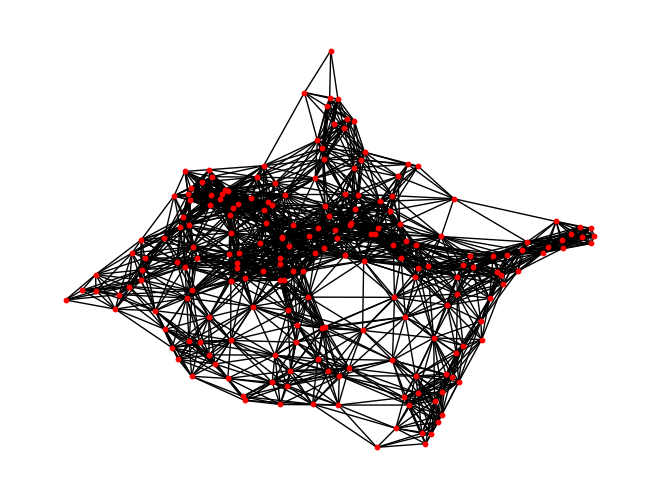

15


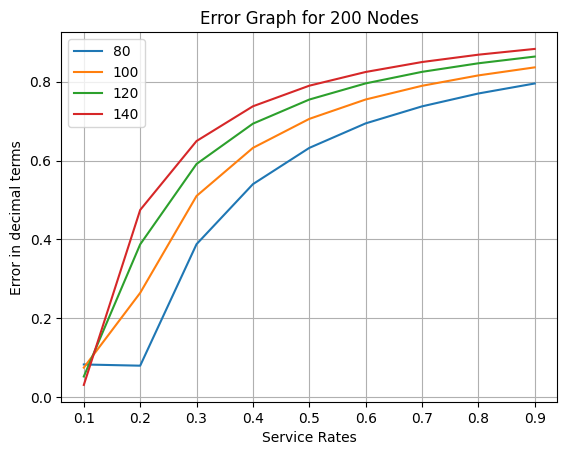

In [ ]:
n=200
graph=generate_random_graph(n)
max,min,avg=cal_graph_degrees(graph)
print(max,min,avg)
maximal=0
maximal=cliquesize(graph)
draw_graph(graph)

#channel=20
print(maximal)
k=0.1
x_axis=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for channel in np.arange(80,160,20):
  errors=[]
  for k in np.arange(0.1, 1.0, 0.1):
    fraction=[k*((channel)/maximal)]*(n)
    probab=find(fraction,graph,channel)
    num=10000
    #iterations
    ppp,rates=simulate_csma(graph,probab,num,channel)
    net=[0]*(n)
    for i in range(n):
      if rates[i]>fraction[i]:
        net[i]=0
      else:
        net[i]=(-rates[i]+fraction[i])/fraction[i]
    error=statistics.mean(net)
    errors.append(error)
  plt.plot(x_axis,errors, label=channel)

plt.title('Error Graph for 200 Nodes')
plt.xlabel('Service Rates')
plt.ylabel('Error in decimal terms')
plt.legend()  # Show legend with labels
plt.grid(True)
plt.show()


In [ ]:
rounds=50
n=50
channel=20
fraction=[0.5]*(n)
errors=[]
cq_size=[]
avg_degree=[]
for x in range(rounds):
  graph=generate_random_graph(n)
  cq_size.append(cliquesize(graph))
  max,min,avg=cal_graph_degrees(graph)
  avg_degree.append(avg)
  probab=find(fraction,graph,channel)
  num=10000
  #iterations
  ppp,rates=simulate_csma(graph,probab,num,channel)
  net=[0]*(n)
  for i in range(n):
    if rates[i]>fraction[i]:
      net[i]=0
    else:
      net[i]=(-rates[i]+fraction[i])/fraction[i]
  error=statistics.mean(net)
  errors.append(error)

print(error)
print(cq_size)
print(avg_degree)


0.063832
[5, 7, 9, 6, 7, 6, 6, 6, 7, 6, 6, 7, 7, 7, 7, 6, 6, 6, 7, 6, 6, 7, 6, 7, 5, 6, 7, 7, 7, 7, 6, 6, 8, 7, 6, 8, 6, 6, 7, 6, 8, 6, 6, 5, 5, 5, 6, 6, 5, 8]
[4.92, 5.2, 5.48, 5.4, 5.72, 5.12, 5.0, 6.2, 6.24, 5.32, 5.12, 5.56, 5.48, 5.68, 5.72, 4.36, 5.6, 5.08, 5.0, 4.64, 4.76, 5.44, 5.2, 5.48, 4.76, 5.04, 5.2, 5.76, 4.72, 5.56, 5.16, 4.44, 4.72, 5.8, 5.36, 5.12, 4.96, 5.2, 4.92, 5.36, 5.76, 5.88, 5.16, 5.28, 4.64, 4.4, 4.52, 6.04, 4.28, 5.88]


[4.425, 5.996666666666667, 8.285, 10.577, 12.58]


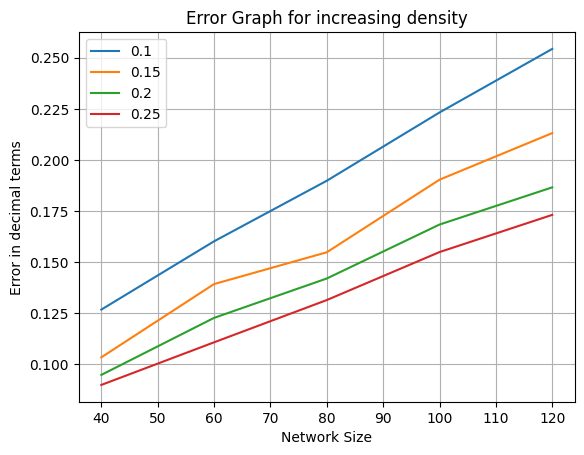

In [ ]:
network_size=[40,60,80,100,120]
load=[0.1,0.15,0.20,0.25]
round=20
channel=10
for k in load:
  avg_errors=[]
  dd=[]
  for n in network_size:
    errors=[]
    avg_degrees=[]
    for x in range(round):
      graph=generate_random_graph(n)
      ma,mi,ag=cal_graph_degrees(graph)
      avg_degrees.append(ag)
      maximal=cliquesize(graph)
      fraction=[k*((channel)/maximal)]*(n)
      probab=find(fraction,graph,channel)
      num=10000
      #iterations
      ppp,rates=simulate_csma(graph,probab,num,channel)
      net=[0]*(n)
      for i in range(n):
        if rates[i]>fraction[i]:
          net[i]=0
        else:
          net[i]=(-rates[i]+fraction[i])/fraction[i]
      error=statistics.mean(net)
      errors.append(error)
    avg_error=statistics.mean(errors)
    avg_errors.append(avg_error)
    dd.append(statistics.mean(avg_degrees))

  plt.plot(network_size,avg_errors,label=k)
print(dd)
plt.title('Error Graph for increasing density')
plt.xlabel('Network Size')
plt.ylabel('Error in decimal terms')
plt.legend()  # Show legend with labels
plt.grid(True)
plt.show()






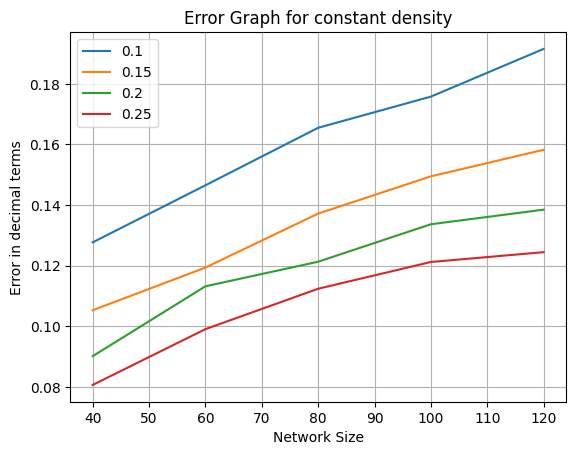

In [ ]:
network_size=[40,60,80,100,120]
load=[0.1,0.15,0.20,0.25]
round=20
channel=10
for k in load:
  avg_errors=[]
  for n in network_size:
    errors=[]
    for x in range(round):
      graph=generate_random_graph2(n)
      maximal=cliquesize(graph)
      fraction=[k*((channel)/maximal)]*(n)
      probab=find(fraction,graph,channel)
      num=10000
      #iterations
      ppp,rates=simulate_csma(graph,probab,num,channel)
      net=[0]*(n)
      for i in range(n):
        if rates[i]>fraction[i]:
          net[i]=0
        else:
          net[i]=(-rates[i]+fraction[i])/fraction[i]
      error=statistics.mean(net)
      errors.append(error)
    avg_error=statistics.mean(errors)
    avg_errors.append(avg_error)
  plt.plot(network_size,avg_errors,label=k)

plt.title('Error Graph for constant density')
plt.xlabel('Network Size')
plt.ylabel('Error in decimal terms')
plt.legend()  # Show legend with labels
plt.grid(True)
plt.show()


In [8]:
def errorf(rates,fraction,n):
  net=[0]*(n)
  #print("Initial-", fraction)
  print("Final-", rates)
  #fraction - initial
  #rates - final
  for i in range(n):
    if rates[i]>fraction[i]:
      net[i]=0
    else:
      net[i]=(-rates[i]+fraction[i])/fraction[i]
  error=statistics.mean(net)
  return error


[0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333,

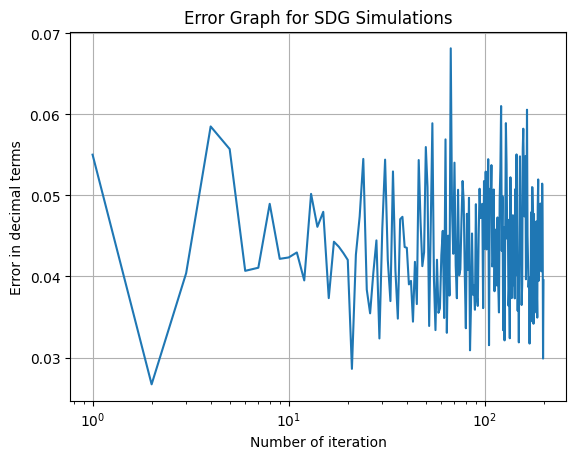

In [12]:
def sdg(fraction_time_wanted,constant,initial_prob,graph,num_iterations,N,number,channel):
 prob= initial_prob
 count =1
 x_axis=[]
 y_axis=[]
 while(count<number):
  xx,time=simulate_csma(graph,prob,num_iterations,channel)
  prob_new=[]
  sum=0
  for i in range(len(graph)):
    a=prob[i]+(constant)*(fraction_time_wanted[i]-time[i])
    #print(time[i])
    sum+=(fraction_time_wanted[i]-time[i])**2
    prob_new.append(a)
  prob=prob_new
  #print(time)
  x_axis.append(count)
  y_axis.append(errorf(time,fraction_time_wanted,len(graph)))
  count=count+1
 plt.plot(x_axis,y_axis,label='Function')
 plt.title('Error Graph for SDG Simulations')
 plt.xscale('log')
 plt.xlabel('Number of iteration')
 plt.ylabel('Error in decimal terms')
 #plt.legend()  # Show legend with labels
 plt.grid(True)
 plt.show()

n=100
constant=0.15 #step size
N=0.25 #maxerror
graph=generate_random_graph(n)
maximal=cliquesize(graph)
channel=25
fraction=[0.3*((channel)/maximal)]*(n)
print(fraction)
initial=[0.4]*(n)
number= 200    #iterations of sdg
num=3000
#iterations of csma
sdg(fraction,constant,initial,graph,num,N,number,channel)


In [ ]:
count =50
x=1/count
print(x)

0.02
